In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import display, clear_output

import functions as f
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### <center> Cel statystyczny: Analiza statystyk odpawiadających na potrzeby osoby potencjalenie zainteresowanej założeniem zbiórki na portalu Kickstarter.</center>

### <center> Cel python: Aplikacja wspierająca użytkowników chcących założyć zbiórkę.</center>
<center><img src="should-i-buy-from-kickstarter-main.webp"/></center>



#### GRUPA: gold_diggers

In [3]:
#Zaimportowanie pliku z pc
df_clean = f.f_file_import('df_clean.csv')

In [4]:
#tworzymy listy
list_main_cat = f.unique_value_list(df_clean, 'main_category')
list_country = f.unique_value_list(df_clean, 'country')
list_launched_year = f.unique_value_list_sorted(df_clean, 'launched_year')

In [5]:
# widgety
widget_main_cat = f.widget_def(list_main_cat, 'Kategoria')
widget_country = f.widget_def(list_country, 'Kraj' )
widget_launched_year = f.widget_def(list_launched_year, 'Rok uruchomienia zbiórki' )
widget_days = widgets.IntRangeSlider(
    value=[1, 60],
    min=1,
    max=60,
    step=1,
    description='Czas trwania zbiórki:',
    style={'description_width':'initial'},
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
widget_value = widgets.IntText(description='Cel zbiórki >=')

# **<center><span style="color:#05ce78"> OGÓLNE STATYSTYKI </span></center>**

# <center> <span style="color:#05ce78"> Rozkład liczby zbiórek na rok założenia zbiórki </span></center>

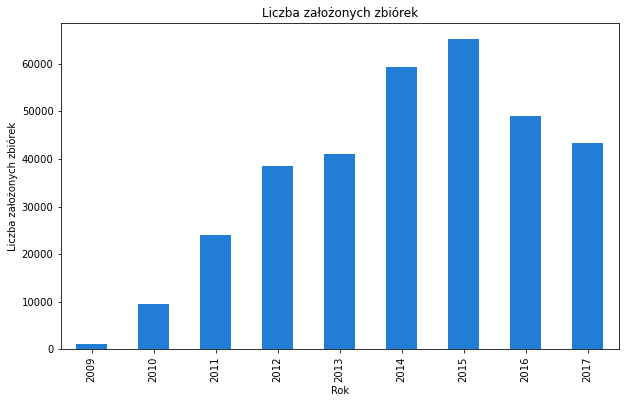

In [6]:
year_count = f.bar_plot_1_var_date(df_clean, 'launched_year', x_label='Rok', y_label='Liczba założonych zbiórek', title_fig='Liczba założonych zbiórek')


# <center> <span style="color:#05ce78"> Rozkład liczby zakładanych zbiórek na miesiące </span></center>

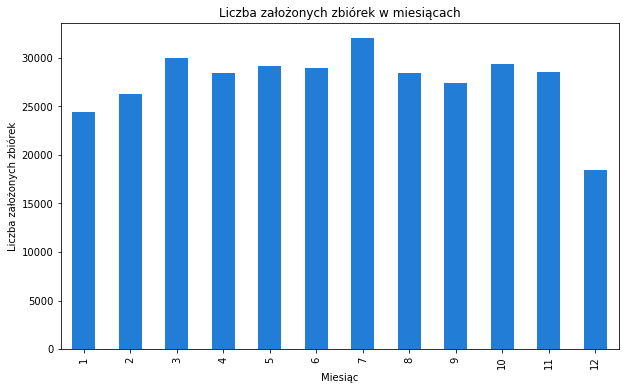

In [7]:
 year_count = f.bar_plot_1_var_date(df_clean, 'launched_month', x_label='Miesiąc', y_label='Liczba założonych zbiórek', title_fig='Liczba założonych zbiórek w miesiącach')

# <center> <span style="color:#05ce78"> Rozkład liczby zakładanych zbiórek w krajach </span></center>

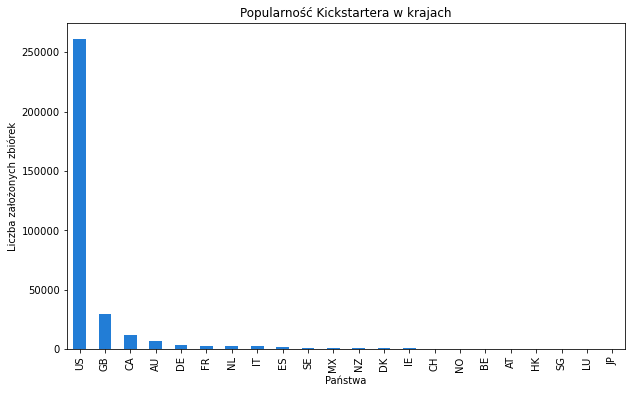

In [8]:
country_count = f.bar_plot_1_var(df_clean, 'country',colors='#227DD6',alph=1, x_label='Państwa', y_label='Liczba założonych zbiórek', title_fig='Popularność Kickstartera w krajach')

# <center> <span style="color:#05ce78"> Popularność Kickstartera w wybranych krajach </span></center>

In [9]:
 widget_country

SelectMultiple(description='Kraj', index=(0,), layout=Layout(height='200px', width='60%'), options=('GB', 'US'…

In [10]:
refresh_button1 = widgets.Button(description="Odśwież",style=dict(font_weight='bold',button_color='#05ce78'),layout=Layout(width='100%', height='80px'))
output1 = widgets.Output()


def refresh_country(b):
    clear_output()
    display(refresh_button1, output1)
    list_wdg_main_category = list(widget_country.value)
    df_new = df_clean[( df_clean['country'].isin(list_wdg_main_category) )]
    return f.bar_plot_1_var(df_new, 'country',x_label='Państwo',colors=['#227DD6'], y_label='Liczba założonych zbiórek', title_fig='Popularność Kickstartera w wybranych krajach' )

display(refresh_button1, output1)
refresh_button1.on_click(refresh_country)




Button(description='Odśwież', layout=Layout(height='80px', width='100%'), style=ButtonStyle(button_color='#05c…

Output()

# <center> <span style="color:#05ce78"> Popularność kategorii </span></center>

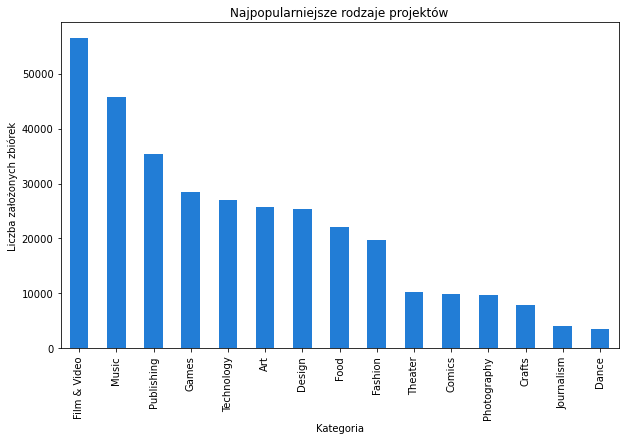

In [11]:
main_category_count = f.bar_plot_1_var(df_clean, 'main_category',colors = '#227DD6',alph=1, x_label='Kategoria', y_label='Liczba założonych zbiórek', title_fig='Najpopularniejsze rodzaje projektów')

# <center> <span style="color:#05ce78"> Rozkład udanych i nieudanych zbiórek </span></center>

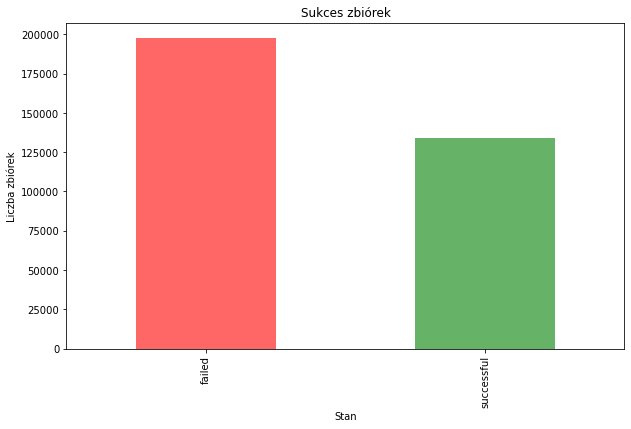

In [12]:
state_count = f.bar_plot_1_var(df_clean, 'state',alph=0.6, x_label='Stan', y_label='Liczba zbiórek', title_fig='Sukces zbiórek')

#  <center> <span style="color:#05ce78"> Średnia kwota zebrana w kategoriach </span></center>

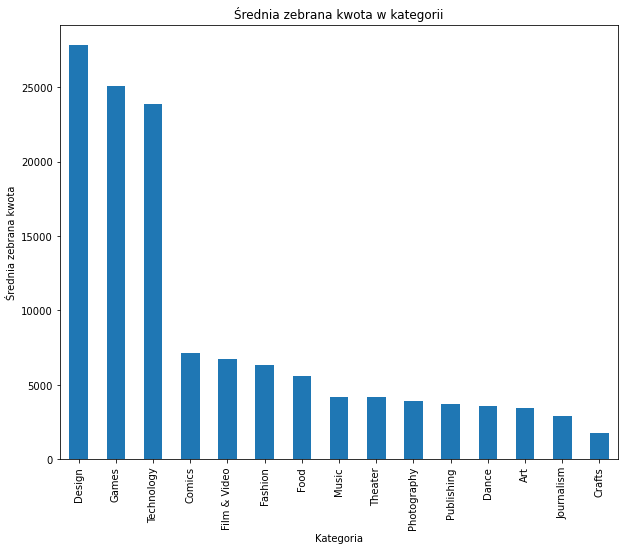

In [13]:
main_category_usd_pledged_real_mean = f.bar_plot_1_var_mean(df_clean, 'main_category', 'usd_pledged_real', x_label='Kategoria', y_label='Średnia zebrana kwota', title_fig='Średnia zebrana kwota w kategorii')

# <center> <span style="color:#05ce78"> Jaką kwotę chcesz zebrać? </span></center>

## <center> <span style="color:#05ce78">  Zbiórki odnoszące sukces powyżej danej kwoty </span></center>

In [14]:
widget_maincat_value = f.widget_layout(widget_main_cat, widget_value)
widget_maincat_value

Box(children=(SelectMultiple(description='Kategoria', index=(0,), layout=Layout(height='200px', width='60%'), …

In [15]:
refresh_button2 = widgets.Button(description="Odśwież",style=dict(font_weight='bold',button_color='#05ce78'),layout=Layout(width='100%', height='80px'))
output2 = widgets.Output()

def refresh_maincat_amaount(b):
    clear_output()
    display(refresh_button2, output2)
    value_max = widget_value.value
    list_wdg_main_category = list(widget_main_cat.value)
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category))]  
    return f.filter_greater_equal(df_new, value_max, ['state','main_category'], ['#FF6666','#66B266'], 'stan', '[%]', 'Sukces zbiórek powyżej podanej kwoty')

display(refresh_button2, output2)
refresh_button2.on_click(refresh_maincat_amaount)

Button(description='Odśwież', layout=Layout(height='80px', width='100%'), style=ButtonStyle(button_color='#05c…

Output()

# <center> <span style="color:#05ce78"> Udane i nieudane zbiórki rozkład procentowy </span></center>

In [16]:
widget_country

SelectMultiple(description='Kraj', index=(0,), layout=Layout(height='200px', width='60%'), options=('GB', 'US'…

In [17]:
refresh_button3 = widgets.Button(description="Odśwież",style=dict(font_weight='bold',button_color='#05ce78'),layout=Layout(width='100%', height='80px'))
output3 = widgets.Output()

def refresh_country_state(b):
    clear_output()
    display(refresh_button3, output3)
    list_wdg_country = list(widget_country.value)
    df_new = df_clean[( df_clean['country'].isin(list_wdg_country) )]
    f.barplot_pct(df_new,['country', 'state'], x_label='Państwa',y_label='[%]', title_fig='Udane i nieudane zbiórki w wybranych państwach')
    f.barplot_pct(df_new,['state', 'country'], ['#FF6666','#66B266'], x_label='stan',y_label='[%]', title_fig='Sukces zbiórek w wybranych krajach')

display(refresh_button3, output3)
refresh_button3.on_click(refresh_country_state)

Button(description='Odśwież', layout=Layout(height='80px', width='100%'), style=ButtonStyle(button_color='#05c…

Output()

# <center> <span style="color:#05ce78"> Średnia kwota celu zbiórki dla krajów w podziale na udane i nieudane zbiórki </span></center>

In [18]:
widget_country

SelectMultiple(description='Kraj', index=(0,), layout=Layout(height='200px', width='60%'), options=('GB', 'US'…

In [19]:
refresh_button4 = widgets.Button(description="Odśwież",style=dict(font_weight='bold',button_color='#05ce78'),layout=Layout(width='100%', height='80px'))
output4 = widgets.Output()

def refresh_country_state_goal(b):
    clear_output()
    display(refresh_button4, output4)
    list_wdg_main_category = list(widget_country.value)
    df_new = df_clean[( df_clean['country'].isin(list_wdg_main_category) )]
    df_new1 = f.aggregate_fun(df_new, ['country', 'state'], 'usd_goal_real')
    df_new2 = f.aggregate_fun(df_new, ['country', 'state'], 'usd_pledged_real')
    f.bar_plot_2_var(df_new1, 'country', 'state', 'mean_x', ['#FF6666','#66B266'],2,8, x_label='Stan', y_label='średnia kwota celu [$]', title_fig='Średnia kwota celu zbiórek')
    f.bar_plot_2_var(df_new2, 'country', 'state', 'mean_x', ['#FF6666','#66B266'],2,8, x_label='Stan', y_label='średnia zebrana kwota [$]', title_fig='Średnia zebrana kwota ze zbiórek')

display(refresh_button4, output4)
refresh_button4.on_click(refresh_country_state_goal)

Button(description='Odśwież', layout=Layout(height='80px', width='100%'), style=ButtonStyle(button_color='#05c…

Output()


# <center> <span style="color:#05ce78"> Popularność kategorii w krajach [%]</span></center>

In [20]:
widget_maincat_country = f.widget_layout(widget_main_cat, widget_country)
widget_maincat_country

Box(children=(SelectMultiple(description='Kategoria', index=(0,), layout=Layout(height='200px', width='60%'), …

In [21]:
refresh_button5 = widgets.Button(description="Odśwież",style=dict(font_weight='bold',button_color='#05ce78'),layout=Layout(width='100%', height='80px'))
output5 = widgets.Output()

def refresh_country_maincat_pct(b):
    clear_output()
    display(refresh_button5, output5)
    list_wdg_main_category = list(widget_main_cat.value)
    list_wdg_country = list(widget_country.value)
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['country'].isin(list_wdg_country) )]
    return f.barplot_pct(df_new,['country', 'main_category'],  x_label='Państwa', y_label='[%]', title_fig="Popularność kategorii w krajach")

display(refresh_button5, output5)
refresh_button5.on_click(refresh_country_maincat_pct)

Button(description='Odśwież', layout=Layout(height='80px', width='100%'), style=ButtonStyle(button_color='#05c…

Output()

# <center> <span style="color:#05ce78"> Popularność kategorii w krajach [w liczbach]</span></center>

In [22]:
widget_maincat_country = f.widget_layout(widget_main_cat, widget_country)
widget_maincat_country

Box(children=(SelectMultiple(description='Kategoria', index=(0,), layout=Layout(height='200px', width='60%'), …

In [23]:
refresh_button6 = widgets.Button(description="Odśwież",style=dict(font_weight='bold',button_color='#05ce78'),layout=Layout(width='100%', height='80px'))
output6 = widgets.Output()

def refresh_maincat_country_pct(b):
    print(type(b))
    clear_output()
    display(refresh_button6, output6)
    list_wdg_main_category = list(widget_main_cat.value)
    list_wdg_country = list(widget_country.value)
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['country'].isin(list_wdg_country) )]
    return f.count_plot_col(df_new, 'main_category', 'country', 2,8, x_label="Państwa", y_label='Liczba zbiórek', title_fig='Popularność kategorii w krajach')

display(refresh_button6, output6)
refresh_button6.on_click(refresh_maincat_country_pct)

Button(description='Odśwież', layout=Layout(height='80px', width='100%'), style=ButtonStyle(button_color='#05c…

Output()

# <center> <span style="color:#05ce78"> Mediana zakładanych celów zbiórek na ktegorie i kraj i sukcesy</span></center>

In [24]:
widget_maincat_country = f.widget_layout(widget_main_cat, widget_country)
widget_maincat_country

Box(children=(SelectMultiple(description='Kategoria', index=(0,), layout=Layout(height='200px', width='60%'), …

In [25]:
refresh_button7 = widgets.Button(description="Odśwież",style=dict(font_weight='bold',button_color='#05ce78'),layout=Layout(width='100%', height='80px'))
output7 = widgets.Output()

def refresh_maincat_country_state_goal(b):
    clear_output()
    display(refresh_button7, output7)
    list_wdg_main_category = list(widget_main_cat.value)
    list_wdg_country = list(widget_country.value)
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['country'].isin(list_wdg_country) )]
    return f.bar_plot_3_var(df_new, var_col = 'main_category', var_x = 'country', var_y = 'median_x', hue_var = 'state',zmienna_ilosciowa = 'usd_goal_real', palette_list = ['#FF6666','#66B266'],column_wrap =2, height_value = 6, x_label='Państwa', y_label='Mediana celu zbiórek', title_fig='Przeciętna kwota celu')

display(refresh_button7, output7)
refresh_button7.on_click(refresh_maincat_country_state_goal)

Button(description='Odśwież', layout=Layout(height='80px', width='100%'), style=ButtonStyle(button_color='#05c…

Output()

# <center> <span style="color:#05ce78"> Popularność katergorii w latach </span></center>

In [26]:
#Widget do poniższych wykresów
widget_maincat_launched_year = f.widget_layout(widget_main_cat, widget_launched_year)
widget_maincat_launched_year

Box(children=(SelectMultiple(description='Kategoria', index=(0,), layout=Layout(height='200px', width='60%'), …

In [27]:
refresh_button8 = widgets.Button(description="Odśwież",style=dict(font_weight='bold',button_color='#05ce78'),layout=Layout(width='100%', height='80px'))
output8 = widgets.Output()

def refresh_maincat_year_number(b):
    clear_output()
    display(refresh_button8, output8)
    list_wdg_main_category = list(widget_main_cat.value)
    list_launched_year = list(widget_launched_year.value)
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['launched_year'].isin(list_launched_year) )]
    return f.count_plot_col(df_new, 'main_category', 'launched_year', x_label='Rok', y_label='Liczba zbiórek', title_fig='Popularność kategorii w latach')

display(refresh_button8, output8)
refresh_button8.on_click(refresh_maincat_year_number)

Button(description='Odśwież', layout=Layout(height='80px', width='100%'), style=ButtonStyle(button_color='#05c…

Output()

# <center> <span style="color:#05ce78"> Wpływ czasu trwania zbiórki na jej sukces w liczbach </span></center>

In [28]:
widget_maincat_days = f.widget_layout(widget_main_cat, widget_days)
widget_maincat_days

Box(children=(SelectMultiple(description='Kategoria', index=(0,), layout=Layout(height='200px', width='60%'), …

In [29]:
refresh_button9 = widgets.Button(description="Odśwież",style=dict(font_weight='bold',button_color='#05ce78'),layout=Layout(width='100%', height='80px'))
output9 = widgets.Output()

def refresh_maincat_duration_state(b):
    clear_output()
    display(refresh_button9, output9)
    list_wdg_main_category = list(widget_main_cat.value)
    days_tuple = list(widget_days.value)
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category)) & (df_clean['duration'] >= days_tuple[0]) & (df_clean['duration'] <= days_tuple[1])]
    return f.bar_plot_3_var(df_new, 'main_category', 'duration', 'count_x', 'state', 'ID', ['#FF6666','#66B266'], 1, 10,x_label='Dni',y_label='Liczba zbiórek',title_fig='Wpływ czasu trwania zbiórki na jej sukces')

display(refresh_button9, output9)
refresh_button9.on_click(refresh_maincat_duration_state)

Button(description='Odśwież', layout=Layout(height='80px', width='100%'), style=ButtonStyle(button_color='#05c…

Output()

# <center> <span style="color:#05ce78"> Wpływ czasu trwania zbiórki na jej sukces [%]</span></center>

In [30]:
widget_maincat_days = f.widget_layout(widget_main_cat, widget_days)
widget_maincat_days

Box(children=(SelectMultiple(description='Kategoria', index=(0,), layout=Layout(height='200px', width='60%'), …

In [31]:
refresh_button10 = widgets.Button(description="Odśwież",style=dict(font_weight='bold',button_color='#05ce78'),layout=Layout(width='100%', height='80px'))
output10 = widgets.Output()

def refresh_maincat_duration_state_pct(b):
    clear_output()
    display(refresh_button10, output10)
    list_wdg_main_category = list(widget_main_cat.value)
    days_tuple = list(widget_days.value)
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category)) & (df_clean['duration'] >= days_tuple[0]) & (df_clean['duration'] <= days_tuple[1])]
    return f.barplot_pct_3_var(df_new, ['main_category','duration','state'], x_label='Czas trwania zbiórki', y_label='[%]', title_fig='Wpływ czasu trwania zbiórki na jej sukces')

display(refresh_button10, output10)
refresh_button10.on_click(refresh_maincat_duration_state_pct)

Button(description='Odśwież', layout=Layout(height='80px', width='100%'), style=ButtonStyle(button_color='#05c…

Output()

# <center><span style="color:#05ce78"> DZIĘKUJEMY ZA UWAGĘ</span></center>
<center><img src="unnamed.png"/></center>